### Self-interstitial energy
$$E^f = E[n+1] - E[n] - E_{atom}$$
$$E^f = E[n] - \frac{n}{n+1}E[n+1]$$

In [1]:
from pyiron import Project
import numpy as np
import matplotlib.pylab as plt

In [2]:
potential =  'FeH-NNIP'

$E^f_{i-O}$: self interstial atom in octahedral site

In [3]:
pr = Project('Self-interstitial')

In [4]:
E = []

In [5]:
# build supercell, relax, calculate energy
job = pr.create.job.Lammps('minimise', delete_existing_job=True)
sc = pr.create.structure.bulk('Fe', crystalstructure='bcc', cubic=True).repeat([4,4,4])
job.structure = sc
job.potential = potential
job.calc_minimize(pressure=0.0)
job.run(delete_existing_job=True)
E_sc = job.output.energy_tot[-1]
structure = job.get_structure(frame=-1)

The job minimise was saved and received the ID: 10161


In [6]:
# add Fe atom
cell = structure.get_cell()
adatom = pr.create.structure.atoms(['Fe'], [(2.83/4*6, 2.83/4*8, 2.83/4*6)], cell=cell)

structure_1 = structure.copy()
structure_1 += adatom
structure_1.plot3d()

NGLWidget()

In [7]:
# calculate energy
job_1 = pr.create.job.Lammps('self', delete_existing_job=True)
job_1.structure = structure_1
job_1.potential = potential
job_1.calc_minimize()
job_1.run(delete_existing_job=True)

The job self was saved and received the ID: 10162


In [8]:
E_selfo = job_1.output.energy_tot[-1]
E1 = E_sc - len(structure)/len(structure_1)*E_selfo
E.append(-E1)
E1

-4.1134268061373405

$E^f_{i-T}$: self interstial atom in tetrahedral site

In [9]:
# add Fe atom
cell = structure.get_cell()
adatom = pr.create.structure.atoms(['Fe'], [(2.83/4*6, 2.83/4*8, 2.83/4*6-2.83/4)], cell=cell)

structure_2 = structure.copy()
structure_2 += adatom
# structure_2.plot3d()

In [10]:
job_2 = pr.create.job.Lammps('self2', delete_existing_job=True)
job_2.structure = structure_2
job_2.potential = potential
job_2.calc_minimize()
job_2.run(delete_existing_job=True)

E_selft = job_1.output.energy_tot[-1]
E2 = E_sc - len(structure)/len(structure_1)*E_selft
E.append(-E2)
E2

The job self2 was saved and received the ID: 10163


-4.1134268061373405

$E^f_{i-[110]}$ ~ dumbbells configuration

In [11]:
structure_3 = structure.copy()
del structure_3[1]
# structure_3.plot3d()

adatom = pr.create.structure.atoms(['Fe'], [(2.83/4*1, 2.83/2, 2.83/4*3)], cell=cell)
adatom2 = pr.create.structure.atoms(['Fe'], [(2.83/4*3, 2.83/2, 2.83/4*1)], cell=cell)
structure_3 = structure.copy()
del structure_3[1]
structure_3 += adatom
structure_3 += adatom2
# structure_3.plot3d()

In [12]:
job_3 = pr.create.job.Lammps('self3', delete_existing_job=True)
job_3.structure = structure_3
job_3.potential = potential

job_3.calc_minimize()
job_3.run(delete_existing_job=True)

The job self3 was saved and received the ID: 10164


In [13]:
E_self110 = job_3.output.energy_tot[-1]
E3 = E_sc - len(structure)/len(structure_1)*E_self110
E.append(-E3)
E3

-4.113426806028201

$E^f_{i-[111]}$

In [14]:
structure_4 = structure.copy()
del structure_4[1]
# structure_4.plot3d()

adatom = pr.create.structure.atoms(['Fe'], [(2.83/4.9*1.45, 2.83/4.9*1.45, 2.83/4.9*1.45)], cell=cell)
adatom2 = pr.create.structure.atoms(['Fe'], [(2.83/4.9*3.45, 2.83/4.9*3.45, 2.83/4.9*3.45)], cell=cell)
structure_4 = structure.copy()
del structure_4[1]
structure_4 += adatom
structure_4 += adatom2
# structure_4.plot3d()

In [15]:
job_4 = pr.create.job.Lammps('self4', delete_existing_job=True)
job_4.structure = structure_4
job_4.potential = potential
job_4.calc_minimize()
job_4.run(delete_existing_job=True)

The job self4 was saved and received the ID: 10165


In [16]:
E_self111 = job_4.output.energy_tot[-1]
E4 = E_sc - len(structure)/len(structure_1)*E_self111
E.append(-E4)
E4

-4.848814919422239

$E^f_{i-[001]}$

In [17]:
structure_5 = structure.copy()
del structure_5[1]

adatom = pr.create.structure.atoms(['Fe'], [(0.145*2.83, 2.83/2, 2.83/2)], cell=cell)
adatom2 = pr.create.structure.atoms(['Fe'], [((1-0.145)*2.83, 2.83/2, 2.83/2)], cell=cell)
structure_5 = structure.copy()
del structure_5[1]
structure_5 += adatom
structure_5 += adatom2
# structure_5.plot3d()

In [18]:
job_5 = pr.create.job.Lammps('self5', delete_existing_job=True)
job_5.structure = structure_5
job_5.potential = potential
job_5.calc_minimize()
job_5.run(delete_existing_job=True)

The job self5 was saved and received the ID: 10166


In [19]:
E_self001 = job_5.output.energy_tot[-1]
E5 = E_sc - len(structure)/len(structure_1)*E_self001
E.append(-E5)
E5

-5.18077330398296

In [20]:
E_ref = [5.322, 4.448,  4.037, 4.744, 5.062]

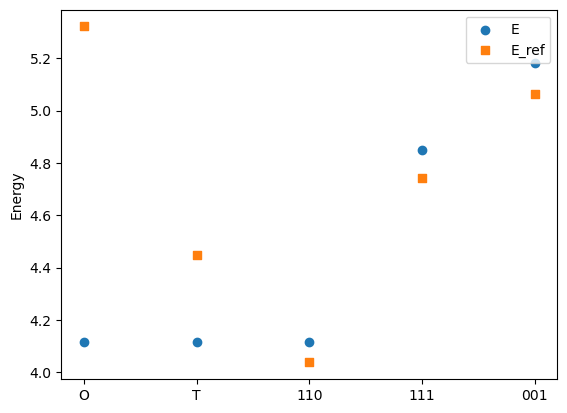

In [21]:
X = ['O', 'T', '110', '111', '001']
plt.scatter(X, E, label='E', marker='o')
plt.scatter(X, E_ref, label='E_ref', marker='s')

plt.ylabel('Energy')
plt.legend()

plt.show()

In [22]:
from ase.geometry.analysis import Analysis

In [23]:
from pyiron import pyiron_to_ase
s0 = pyiron_to_ase(structure)
s1 = pyiron_to_ase(structure_1)
s2 = pyiron_to_ase(structure_2)
s3 = pyiron_to_ase(structure_3)
s4 = pyiron_to_ase(structure_4)
s5 = pyiron_to_ase(structure_5)

In [24]:
ana0 = Analysis(s0)
ana1 = Analysis(s1)
ana2 = Analysis(s2)
ana3 = Analysis(s3)
ana4 = Analysis(s4)
ana5 = Analysis(s5)

In [25]:
ana0.get_rdf(rmax=5, nbins=10)

[array([0.        , 0.        , 0.        , 0.        , 2.83829651,
        1.42694577, 0.        , 0.        , 1.19679323, 2.5555142 ])]

In [26]:
ana1.get_rdf(rmax=5, nbins=10)

[array([0.        , 0.        , 0.03504568, 0.        , 2.81629421,
        1.40490833, 0.04194444, 0.        , 1.20592686, 2.51604739])]

In [27]:
ana2.get_rdf(rmax=5, nbins=10)

[array([0.        , 0.        , 0.        , 0.03599287, 2.79446247,
        1.41954279, 0.02097222, 0.02364028, 1.18444724, 2.53078986])]

In [28]:
ana3.get_rdf(rmax=5, nbins=10)

[array([0.        , 0.        , 0.        , 0.03599287, 2.77808867,
        1.41222556, 0.02621528, 0.03940047, 1.19058428, 2.49639077])]

In [29]:
ana4.get_rdf(rmax=5, nbins=10)

[array([0.        , 0.        , 0.03504568, 0.        , 2.82175214,
        1.40490833, 0.02097222, 0.02758033, 1.19672131, 2.50621908])]

In [30]:
ana5.get_rdf(rmax=5, nbins=10)

[array([0.        , 0.        , 0.        , 0.01799643, 2.79992041,
        1.38295664, 0.06291666, 0.01970024, 1.20899537, 2.48901954])]